In [1]:
import os
import os.path as osp
from os.path import join as pjoin
import time
from datetime import datetime
import json

import numpy as np
np.seterr(all='raise')
from PIL import Image

from lpf.initializers import LiawInitializer
from lpf.models import LiawModel
from lpf.solvers import EulerSolver, RungeKuttaSolver

In [2]:
batch_size = 1  # A single set of parameters
device = "cpu"  # Device option: CPU or GPU

# Time parameters
dt = 0.01
n_iters = 1000000

# Space parameters
dx = 0.1
width = 128
height = 128
shape = (height, width)

In [3]:
# Create the output directory.
str_now = datetime.now().strftime('%Y%m%d-%H%M%S')
dpath_output = pjoin(osp.abspath("./output"), "experiment_batch_%s" % (str_now))
os.makedirs(dpath_output, exist_ok=True)

In [4]:
# Create a dict for parameters.
param_dict =  {
 "u0": 1.9530066532565284, 
 "v0": 2.3936837749803437, 
 "Du": 0.000497858463742147,
 "Dv": 0.07796387325338522,
 "ru": 0.1829963268369453,
 "rv": 0.10001543043288767,
 "k": 0.15824185494975906,
 "su": 0.0004593283228100326,
 "sv": 0.021391505467616145,
 "mu": 0.09084717479481387
}

In [5]:
# In this example, we use 20 positions for initializing u with u0.
param_dict["init_pts_0"] = (20, 81)
param_dict["init_pts_1"] = (16, 27)
param_dict["init_pts_2"] = (85, 93)
param_dict["init_pts_3"] = (28, 39)
param_dict["init_pts_4"] = (119, 77)
param_dict["init_pts_5"] = (105, 39)
param_dict["init_pts_6"] = (68, 92)
param_dict["init_pts_7"] = (57, 46)
param_dict["init_pts_8"] = (53, 82)
param_dict["init_pts_9"] = (73, 78)
param_dict["init_pts_10"] = (25, 8)
param_dict["init_pts_11"] = (98, 23)
param_dict["init_pts_12"] = (74, 46)
param_dict["init_pts_13"] = (117, 45)
param_dict["init_pts_14"] = (58, 65)
param_dict["init_pts_15"] = (70, 75)
param_dict["init_pts_16"] = (71, 108)
param_dict["init_pts_17"] = (106, 36)
param_dict["init_pts_18"] = (125, 72)
param_dict["init_pts_19"] = (105, 84)

In [6]:
param_dict

{'u0': 1.9530066532565284,
 'v0': 2.3936837749803437,
 'Du': 0.000497858463742147,
 'Dv': 0.07796387325338522,
 'ru': 0.1829963268369453,
 'rv': 0.10001543043288767,
 'k': 0.15824185494975906,
 'su': 0.0004593283228100326,
 'sv': 0.021391505467616145,
 'mu': 0.09084717479481387,
 'init_pts_0': (20, 81),
 'init_pts_1': (16, 27),
 'init_pts_2': (85, 93),
 'init_pts_3': (28, 39),
 'init_pts_4': (119, 77),
 'init_pts_5': (105, 39),
 'init_pts_6': (68, 92),
 'init_pts_7': (57, 46),
 'init_pts_8': (53, 82),
 'init_pts_9': (73, 78),
 'init_pts_10': (25, 8),
 'init_pts_11': (98, 23),
 'init_pts_12': (74, 46),
 'init_pts_13': (117, 45),
 'init_pts_14': (58, 65),
 'init_pts_15': (70, 75),
 'init_pts_16': (71, 108),
 'init_pts_17': (106, 36),
 'init_pts_18': (125, 72),
 'init_pts_19': (105, 84)}

In [7]:
model_dicts = []
model_dicts.append(param_dict)

In [8]:
# Create the Liaw initializer.
initializer = LiawInitializer()
initializer.update(model_dicts)
params = LiawModel.parse_params(model_dicts)

In [9]:
# Create the Liaw model.
model = LiawModel(
    initializer=initializer,
    params=params,
    dx=dx,
    width=width,
    height=height,
    device=device
)

In [10]:
# Create the Euler solver.
solver = EulerSolver()

t_beg = time.time()

solver.solve(
    model=model,
    dt=dt,
    n_iters=n_iters,
    dpath_model=dpath_output,
    dpath_ladybird=dpath_output,
    dpath_pattern=dpath_output,
    verbose=0
)

t_end = time.time()

print("Elapsed time: %f sec." % (t_end - t_beg))

Elapsed time: 210.184937 sec.


In [11]:
arr_color = model.colorize(thr_color=0.5)
img_ladybird, img_pattern = model.create_image(0, arr_color)

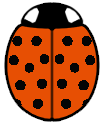

In [12]:
img_ladybird

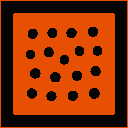

In [13]:
img_pattern

In [14]:
model.save_image(index=0,
                 fpath_ladybird=pjoin(dpath_output, "ladybird.png"),
                 fpath_pattern=pjoin(dpath_output, "pattern.png"),
                 arr_color=arr_color)

In [15]:
!ls {dpath_output}

ladybird.png
model_1
models
pattern.png


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x280f726afa0>
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
